https://www.kaggle.com/code/bhagyattrivedi/data-cleaning-eda-and-model-implementation

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler, OrdinalEncoder
from sklearn.compose import ColumnTransformer

In [3]:
df1 = pd.read_csv("application_record.csv")

In [4]:
df1.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0


In [5]:
df1.shape

(438557, 18)

In [6]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 438557 entries, 0 to 438556
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ID                   438557 non-null  int64  
 1   CODE_GENDER          438557 non-null  object 
 2   FLAG_OWN_CAR         438557 non-null  object 
 3   FLAG_OWN_REALTY      438557 non-null  object 
 4   CNT_CHILDREN         438557 non-null  int64  
 5   AMT_INCOME_TOTAL     438557 non-null  float64
 6   NAME_INCOME_TYPE     438557 non-null  object 
 7   NAME_EDUCATION_TYPE  438557 non-null  object 
 8   NAME_FAMILY_STATUS   438557 non-null  object 
 9   NAME_HOUSING_TYPE    438557 non-null  object 
 10  DAYS_BIRTH           438557 non-null  int64  
 11  DAYS_EMPLOYED        438557 non-null  int64  
 12  FLAG_MOBIL           438557 non-null  int64  
 13  FLAG_WORK_PHONE      438557 non-null  int64  
 14  FLAG_PHONE           438557 non-null  int64  
 15  FLAG_EMAIL       

In [7]:
df1['ID'].duplicated().sum()

47

In [8]:
df1 = df1.drop_duplicates(subset = "ID", keep = "first")

In [9]:
df1.shape

(438510, 18)

In [10]:
df1.columns

Index(['ID', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN',
       'AMT_INCOME_TOTAL', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'FLAG_MOBIL', 'FLAG_WORK_PHONE', 'FLAG_PHONE',
       'FLAG_EMAIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS'],
      dtype='object')

In [11]:
df1.isnull().sum()

ID                          0
CODE_GENDER                 0
FLAG_OWN_CAR                0
FLAG_OWN_REALTY             0
CNT_CHILDREN                0
AMT_INCOME_TOTAL            0
NAME_INCOME_TYPE            0
NAME_EDUCATION_TYPE         0
NAME_FAMILY_STATUS          0
NAME_HOUSING_TYPE           0
DAYS_BIRTH                  0
DAYS_EMPLOYED               0
FLAG_MOBIL                  0
FLAG_WORK_PHONE             0
FLAG_PHONE                  0
FLAG_EMAIL                  0
OCCUPATION_TYPE        134193
CNT_FAM_MEMBERS             0
dtype: int64

In [12]:
df1["NAME_INCOME_TYPE"].unique()

array(['Working', 'Commercial associate', 'Pensioner', 'State servant',
       'Student'], dtype=object)

In [13]:
df1["NAME_EDUCATION_TYPE"].unique()

array(['Higher education', 'Secondary / secondary special',
       'Incomplete higher', 'Lower secondary', 'Academic degree'],
      dtype=object)

In [14]:
df1["NAME_FAMILY_STATUS"].unique()

array(['Civil marriage', 'Married', 'Single / not married', 'Separated',
       'Widow'], dtype=object)

In [15]:
df1['NAME_HOUSING_TYPE'].unique()

array(['Rented apartment', 'House / apartment', 'Municipal apartment',
       'With parents', 'Co-op apartment', 'Office apartment'],
      dtype=object)

In [16]:
df1['FLAG_MOBIL'].value_counts()

FLAG_MOBIL
1    438510
Name: count, dtype: int64

In [17]:
df1['FLAG_WORK_PHONE'].unique()

array([1, 0], dtype=int64)

In [18]:
df1['FLAG_PHONE'].unique()

array([0, 1], dtype=int64)

In [19]:
df1['FLAG_EMAIL'].unique()

array([0, 1], dtype=int64)

In [20]:
df1['OCCUPATION_TYPE'].value_counts(dropna=False)

OCCUPATION_TYPE
NaN                      134193
Laborers                  78231
Core staff                43000
Sales staff               41094
Managers                  35481
Drivers                   26090
High skill tech staff     17285
Accountants               15983
Medicine staff            13518
Cooking staff              8076
Security staff             7993
Cleaning staff             5843
Private service staff      3455
Low-skill Laborers         2140
Secretaries                2044
Waiters/barmen staff       1665
Realty agents              1041
HR staff                    774
IT staff                    604
Name: count, dtype: int64

In [21]:
df1["OCCUPATION_TYPE"].fillna("not_specified", inplace = True)

C:\Users\Zohaib Ali Singay\AppData\Local\Temp\ipykernel_18024\2297846298.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df1["OCCUPATION_TYPE"].fillna("not_specified", inplace = True)


In [22]:
df1["OCCUPATION_TYPE"].value_counts()

OCCUPATION_TYPE
not_specified            134193
Laborers                  78231
Core staff                43000
Sales staff               41094
Managers                  35481
Drivers                   26090
High skill tech staff     17285
Accountants               15983
Medicine staff            13518
Cooking staff              8076
Security staff             7993
Cleaning staff             5843
Private service staff      3455
Low-skill Laborers         2140
Secretaries                2044
Waiters/barmen staff       1665
Realty agents              1041
HR staff                    774
IT staff                    604
Name: count, dtype: int64

In [23]:
df1.describe(percentiles = [.01, .02, .03, .04, .05, .1, .25, .5, .75, .9, .95, .96, .97, .98, .99])

,ID,CNT_CHILDREN,AMT_INCOME_TOTAL,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS
count,4.385100e+05,438510.000000,4.385100e+05,438510.000000,438510.000000,438510.0,438510.000000,438510.000000,438510.000000,438510.000000
mean,6.022035e+06,0.427381,1.875254e+05,-15998.022996,60566.188769,1.0,0.206128,0.287770,0.108200,2.194463
std,5.714962e+05,0.724874,1.100893e+05,4185.016222,138770.072835,0.0,0.404524,0.452724,0.310634,0.897192
min,5.008804e+06,0.000000,2.610000e+04,-25201.000000,-17531.000000,1.0,0.000000,0.000000,0.000000,1.000000
1%,5.024429e+06,0.000000,5.400000e+04,-24013.000000,-10913.000000,1.0,0.000000,0.000000,0.000000,1.000000
2%,5.041533e+06,0.000000,6.750000e+04,-23642.000000,-9533.000000,1.0,0.000000,0.000000,0.000000,1.000000
3%,5.054216e+06,0.000000,6.750000e+04,-23413.000000,-8486.000000,1.0,0.000000,0.000000,0.000000,1.000000
4%,5.068686e+06,0.000000,7.200000e+04,-23181.000000,-7792.000000,1.0,0.000000,0.000000,0.000000,1.000000
5%,5.091807e+06,0.000000,7.650000e+04,-22972.000000,-7205.000000,1.0,0.000000,0.000000,0.000000,1.000000
10%,5.181099e+06,0.000000,9.000000e+04,-21982.000000,-5295.000000,1.0,0.000000,0.000000,0.000000,1.000000


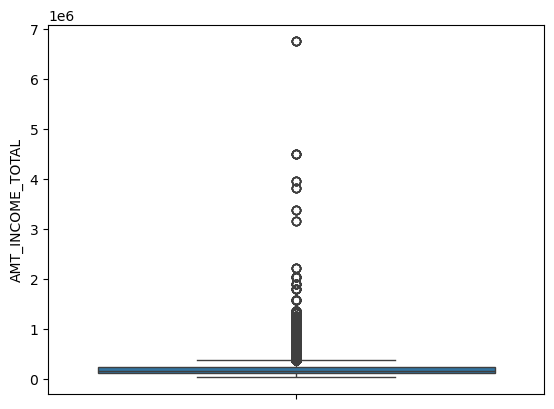

In [24]:
sns.boxplot(df1, y = "AMT_INCOME_TOTAL")
plt.show()

<Axes: ylabel='CNT_CHILDREN'>

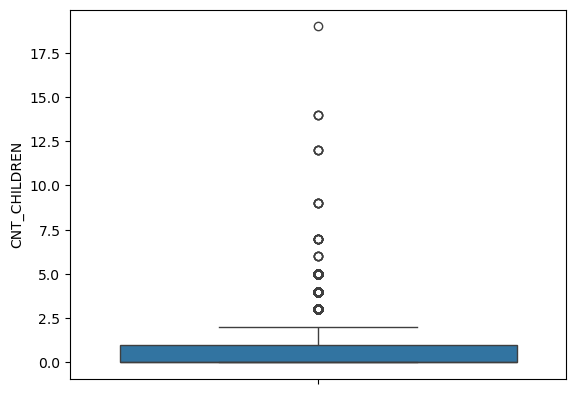

In [25]:
sns.boxplot(y = df1["CNT_CHILDREN"])

In [26]:
df1["DAYS_EMPLOYED"].max()

365243

<Axes: ylabel='DAYS_BIRTH'>

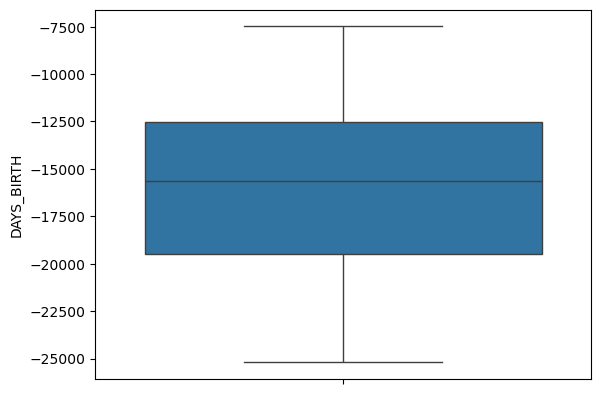

In [27]:
sns.boxplot(y = df1["DAYS_BIRTH"])

<Axes: ylabel='DAYS_EMPLOYED'>

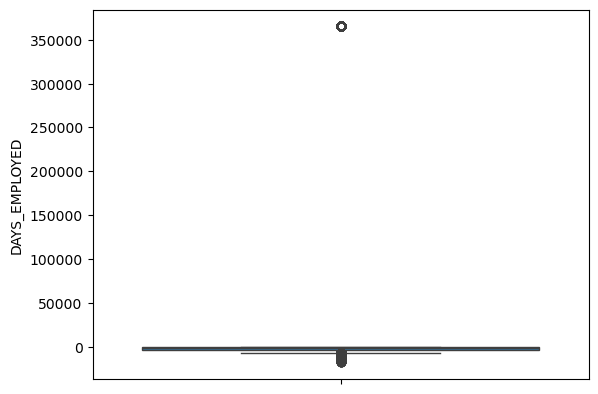

In [28]:
sns.boxplot(y = df1["DAYS_EMPLOYED"])

In [29]:
df1[df1['DAYS_EMPLOYED']>=0]['DAYS_EMPLOYED'].value_counts()

DAYS_EMPLOYED
365243    75324
Name: count, dtype: int64

In [30]:
df1['DAYS_EMPLOYED'].replace(365243,0,inplace=True)

C:\Users\Zohaib Ali Singay\AppData\Local\Temp\ipykernel_18024\265668001.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df1['DAYS_EMPLOYED'].replace(365243,0,inplace=True)


In [31]:
df1[df1['DAYS_EMPLOYED']>=0]['DAYS_EMPLOYED'].value_counts()

DAYS_EMPLOYED
0    75324
Name: count, dtype: int64

In [32]:
df1[df1['DAYS_EMPLOYED']<0]['DAYS_EMPLOYED'].value_counts()

DAYS_EMPLOYED
-218      262
-1678     251
-249      241
-978      240
-430      238
         ... 
-13529      1
-10223      1
-8917       1
-11429      1
-8105       1
Name: count, Length: 9405, dtype: int64

In [33]:
df1["AGE_YEARS"] = round(-df1["DAYS_BIRTH"] / 365.2425, 0)

Sure, here's an example to illustrate:

Suppose you have a DataFrame `df1` with a column `DAYS_BIRTH` representing the age of individuals in days:

```python
import pandas as pd

data = {'DAYS_BIRTH': [-10000, -15000, -20000]}
df1 = pd.DataFrame(data)
```

The DataFrame `df1` looks like this:

| DAYS_BIRTH |
|------------|
| -10000     |
| -15000     |
| -20000     |

Now, you want to convert `DAYS_BIRTH` to years and round the result to the nearest whole number:

```python
df1["AGE_YEARS"] = round(-df1["DAYS_BIRTH"] / 365.2425, 0)
```

Here's what happens step-by-step:

1. **Convert Days to Years**: Divide `DAYS_BIRTH` by 365.2425 to convert days to years.
2. **Negate the Values**: Since `DAYS_BIRTH` is negative (representing days before the current date), negating it gives the positive age in years.
3. **Round to 0 Decimal Places**: Use `round(..., 0)` to round the resulting years to the nearest whole number.

After running the code, `df1` will look like this:

| DAYS_BIRTH | AGE_YEARS |
|------------|-----------|
| -10000     | 27        |
| -15000     | 41        |
| -20000     | 55        |

### Explanation of the Result
- For `DAYS_BIRTH = -10000`: 
  - Convert to years: `10000 / 365.2425 ≈ 27.38`
  - Round to 0 decimal places: `round(27.38, 0) = 27`
  
- For `DAYS_BIRTH = -15000`: 
  - Convert to years: `15000 / 365.2425 ≈ 41.05`
  - Round to 0 decimal places: `round(41.05, 0) = 41`
  
- For `DAYS_BIRTH = -20000`: 
  - Convert to years: `20000 / 365.2425 ≈ 54.79`
  - Round to 0 decimal places: `round(54.79, 0) = 55`

Thus, the `0` in the `round` function ensures the ages are rounded to the nearest whole number.

In [34]:
df1["AGE_YEARS"].head()

0    33.0
1    33.0
2    59.0
3    52.0
4    52.0
Name: AGE_YEARS, dtype: float64

In [35]:
df1["YEARS_EMPLOYED"] = round(-df1["DAYS_EMPLOYED"])

In [36]:
df1.loc[df1["YEARS_EMPLOYED"] < 0, "YEARS_EMPLOYED"] = 0

Let's break down the syntax of `df1.loc[df1["YEARS_EMPLOYED"] < 0, "YEARS_EMPLOYED"] = 0` step by step:

### DataFrame and `.loc`
- **`df1`**: This is the DataFrame we are working with.
- **`.loc`**: This is a label-based indexer for selecting rows and columns in a DataFrame by labels or a boolean array.

### Syntax Breakdown
1. **Condition Inside `.loc`**:
   - `df1["YEARS_EMPLOYED"] < 0`: This creates a boolean Series where each element is `True` if the corresponding value in the `YEARS_EMPLOYED` column is less than 0, and `False` otherwise.
   - Example: If `YEARS_EMPLOYED` has values `[5, -3, 10, -1]`, the boolean Series will be `[False, True, False, True]`.

2. **Using the Boolean Series to Select Rows**:
   - `df1.loc[df1["YEARS_EMPLOYED"] < 0]`: This part selects the rows where the condition is `True`.
   - Example: It will select the rows corresponding to the second and fourth entries.

3. **Selecting the Specific Column**:
   - `df1.loc[df1["YEARS_EMPLOYED"] < 0, "YEARS_EMPLOYED"]`: This part not only selects the rows where the condition is `True`, but also specifies that we are interested in the `YEARS_EMPLOYED` column of those rows.
   - This means we are selecting specific cells (intersections of rows and columns) in the DataFrame.

4. **Assigning a New Value**:
   - `= 0`: This part sets the selected cells to 0.

### Full Syntax in Context
- **`df1.loc[condition, "column"] = value`**: This general structure is used to assign a new value to cells in a DataFrame where the `condition` is `True`.

### Example Walkthrough
Let’s go through a simple example:

```python
import pandas as pd

# Creating a sample DataFrame
data = {'ID': [1, 2, 3, 4], 'YEARS_EMPLOYED': [5, -3, 10, -1]}
df1 = pd.DataFrame(data)

print("Original DataFrame:")
print(df1)

# Applying the transformation
df1.loc[df1["YEARS_EMPLOYED"] < 0, "YEARS_EMPLOYED"] = 0

print("\nTransformed DataFrame:")
print(df1)
```

**Output:**
```
Original DataFrame:
   ID  YEARS_EMPLOYED
0   1               5
1   2              -3
2   3              10
3   4              -1

Transformed DataFrame:
   ID  YEARS_EMPLOYED
0   1               5
1   2               0
2   3              10
3   4               0
```

### Summary
- **`df1.loc`**: Allows label-based indexing.
- **`df1["YEARS_EMPLOYED"] < 0`**: Creates a boolean Series to identify rows where the condition is `True`.
- **`df1.loc[condition, "column"]`**: Selects cells in the specified column where the condition is `True`.
- **`= 0`**: Assigns the value 0 to those cells.

In [37]:
df1.drop(columns = ["DAYS_BIRTH", "DAYS_EMPLOYED"], inplace = True)

In [38]:
df1.describe(percentiles = [.01, .02, .03, .04, .05, .1, .25, .5, .75, .9, .95, .96, .97, .98, .99]).T

,count,mean,std,min,1%,2%,3%,4%,5%,10%,25%,50%,75%,90%,95%,96%,97%,98%,99%,max
ID,438510.0,6.022035e+06,571496.239776,5008804.0,5024429.09,5041533.18,5054216.27,5068686.36,5091807.45,5181098.9,5609362.25,6047719.50,6454160.75,6722537.1,6800362.55,6830288.64,7009897.1,7271099.44,7636888.19,7999952.0
CNT_CHILDREN,438510.0,4.273814e-01,0.724874,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,1.00,2.0,2.00,2.00,2.0,2.00,3.00,19.0
AMT_INCOME_TOTAL,438510.0,1.875254e+05,110089.279583,26100.0,54000.00,67500.00,67500.00,72000.00,76500.00,90000.0,121500.00,160940.25,225000.00,315000.0,360000.00,382500.00,405000.0,450000.00,540000.00,6750000.0
FLAG_MOBIL,438510.0,1.000000e+00,0.000000,1.0,1.00,1.00,1.00,1.00,1.00,1.0,1.00,1.00,1.00,1.0,1.00,1.00,1.0,1.00,1.00,1.0
FLAG_WORK_PHONE,438510.0,2.061276e-01,0.404524,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,1.0,1.00,1.00,1.0,1.00,1.00,1.0
FLAG_PHONE,438510.0,2.877699e-01,0.452724,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,1.00,1.0,1.00,1.00,1.0,1.00,1.00,1.0
FLAG_EMAIL,438510.0,1.082005e-01,0.310634,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,1.0,1.00,1.00,1.0,1.00,1.00,1.0
CNT_FAM_MEMBERS,438510.0,2.194463e+00,0.897192,1.0,1.00,1.00,1.00,1.00,1.00,1.0,2.00,2.00,3.00,3.0,4.00,4.00,4.0,4.00,5.00,20.0
AGE_YEARS,438510.0,4.380453e+01,11.465521,21.0,23.00,25.00,26.00,26.00,27.00,29.0,34.00,43.00,53.00,60.0,63.00,63.00,64.0,65.00,66.00,69.0
YEARS_EMPLOYED,438510.0,2.172549e+03,2397.458545,0.0,0.00,0.00,0.00,0.00,0.00,0.0,371.00,1467.00,3103.00,5295.0,7205.00,7792.00,8486.0,9533.00,10913.00,17531.0


In [39]:
df1["ID"].duplicated().sum()

0

<Axes: ylabel='AMT_INCOME_TOTAL'>

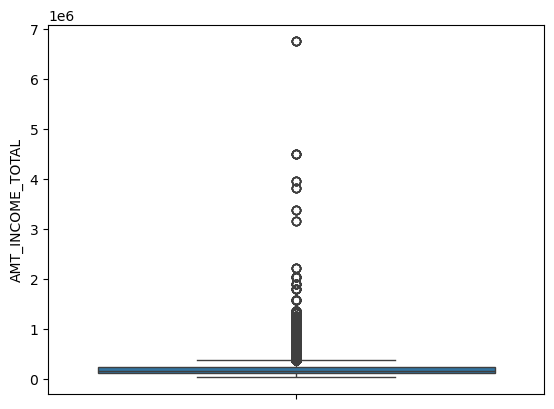

In [40]:
sns.boxplot(data = df1, y = "AMT_INCOME_TOTAL")

In [41]:
df1[df1["AMT_INCOME_TOTAL"] > 54000]

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,AGE_YEARS,YEARS_EMPLOYED
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,1,1,0,0,not_specified,2.0,33.0,4542
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,1,1,0,0,not_specified,2.0,33.0,4542
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,1,0,0,0,Security staff,2.0,59.0,1134
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,1,0,1,1,Sales staff,1.0,52.0,3051
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,1,0,1,1,Sales staff,1.0,52.0,3051
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
438551,6840102,F,N,Y,0,135000.0,Pensioner,Secondary / secondary special,Separated,House / apartment,1,0,0,0,not_specified,1.0,62.0,0
438552,6840104,M,N,Y,0,135000.0,Pensioner,Secondary / secondary special,Separated,House / apartment,1,0,0,0,not_specified,1.0,62.0,0
438553,6840222,F,N,N,0,103500.0,Working,Secondary / secondary special,Single / not married,House / apartment,1,0,0,0,Laborers,1.0,44.0,3007
438555,6842765,F,N,Y,0,72000.0,Pensioner,Secondary / secondary special,Married,House / apartment,1,0,0,0,not_specified,2.0,59.0,0


In [42]:
df1.drop(columns = ["FLAG_MOBIL"], inplace = True)

In [43]:
df2 = pd.read_csv("credit_record.csv")

In [44]:
df2.head()

,ID,MONTHS_BALANCE,STATUS
0,5001711,0,X
1,5001711,-1,0
2,5001711,-2,0
3,5001711,-3,0
4,5001712,0,C


In [45]:
df2.shape

(1048575, 3)

In [46]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 3 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   ID              1048575 non-null  int64 
 1   MONTHS_BALANCE  1048575 non-null  int64 
 2   STATUS          1048575 non-null  object
dtypes: int64(2), object(1)
memory usage: 24.0+ MB


In [47]:
df2.duplicated().sum()

0

In [48]:
df2["MONTHS_BALANCE"].unique()

array([  0,  -1,  -2,  -3,  -4,  -5,  -6,  -7,  -8,  -9, -10, -11, -12,
       -13, -14, -15, -16, -17, -18, -19, -20, -21, -22, -23, -24, -25,
       -26, -27, -28, -29, -30, -31, -32, -33, -34, -35, -36, -37, -38,
       -39, -40, -41, -42, -43, -44, -45, -46, -47, -48, -49, -50, -51,
       -52, -53, -54, -55, -56, -57, -58, -59, -60], dtype=int64)

In [49]:
df2["STATUS"].unique()

array(['X', '0', 'C', '1', '2', '3', '4', '5'], dtype=object)

In [50]:
df2[df2["STATUS"].isin(["X", "C"])]

,ID,MONTHS_BALANCE,STATUS
0,5001711,0,X
4,5001712,0,C
5,5001712,-1,C
6,5001712,-2,C
7,5001712,-3,C
...,...,...,...
1048570,5150487,-25,C
1048571,5150487,-26,C
1048572,5150487,-27,C
1048573,5150487,-28,C


In [51]:
df2["target"] = df2["STATUS"]
df2["target"].replace("X", 0, inplace = True)
df2["target"].replace("C", 0, inplace = True)
df2["target"] = df2["target"].astype(int)
df2.loc[df2['target'] >= 1,'target'] = 1

C:\Users\Zohaib Ali Singay\AppData\Local\Temp\ipykernel_18024\2750152459.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df2["target"].replace("X", 0, inplace = True)
C:\Users\Zohaib Ali Singay\AppData\Local\Temp\ipykernel_18024\2750152459.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behave

In [52]:
df3=pd.DataFrame(df2.groupby(['ID'])['target'].agg("max")).reset_index()

In [53]:
df3.head()

,ID,target
0,5001711,0
1,5001712,0
2,5001713,0
3,5001714,0
4,5001715,0


In [54]:
df3["target"].value_counts()

target
0    40635
1     5350
Name: count, dtype: int64

In [55]:
df = pd.merge(df1, df3, how='inner', on=['ID'])

The `how` argument in the `pd.merge()` function in pandas specifies the type of join to perform. This determines how the rows in the resulting DataFrame are matched and combined based on the `on` or `left_on` and `right_on` keys. There are several types of joins you can specify using the `how` argument: `inner`, `outer`, `left`, and `right`.

### Types of Joins

1. **Inner Join (`how='inner'`)**:
   - Only the rows with keys that are present in both DataFrames are kept.
   - Equivalent to the SQL `INNER JOIN`.
   - Example:
     ```python
     df = pd.merge(df_application, df_credit, on='ID', how='inner')
     ```

2. **Outer Join (`how='outer'`)**:
   - All rows from both DataFrames are kept, with NaNs where there are no matches.
   - Equivalent to the SQL `FULL OUTER JOIN`.
   - Example:
     ```python
     df = pd.merge(df_application, df_credit, on='ID', how='outer')
     ```

3. **Left Join (`how='left'`)**:
   - All rows from the left DataFrame (`df_application`) are kept, and matching rows from the right DataFrame (`df_credit`) are added where available. NaNs are added where there are no matches.
   - Equivalent to the SQL `LEFT JOIN`.
   - Example:
     ```python
     df = pd.merge(df_application, df_credit, on='ID', how='left')
     ```

4. **Right Join (`how='right'`)**:
   - All rows from the right DataFrame (`df_credit`) are kept, and matching rows from the left DataFrame (`df_application`) are added where available. NaNs are added where there are no matches.
   - Equivalent to the SQL `RIGHT JOIN`.
   - Example:
     ```python
     df = pd.merge(df_application, df_credit, on='ID', how='right')
     ```

### Examples

Let's consider two example DataFrames to illustrate the different join types:

```python
import pandas as pd

# Example DataFrames
df_application = pd.DataFrame({
    'ID': [1, 2, 3, 4],
    'Name': ['Alice', 'Bob', 'Charlie', 'David']
})

df_credit = pd.DataFrame({
    'ID': [3, 4, 5, 6],
    'CreditScore': [700, 800, 600, 650]
})
```

#### Inner Join
```python
df_inner = pd.merge(df_application, df_credit, on='ID', how='inner')
print(df_inner)
```
Output:
```
   ID     Name  CreditScore
0   3  Charlie          700
1   4    David          800
```
Only rows with matching `ID`s in both DataFrames are included.

#### Outer Join
```python
df_outer = pd.merge(df_application, df_credit, on='ID', how='outer')
print(df_outer)
```
Output:
```
   ID     Name  CreditScore
0   1    Alice          NaN
1   2      Bob          NaN
2   3  Charlie        700.0
3   4    David        800.0
4   5      NaN        600.0
5   6      NaN        650.0
```
All rows from both DataFrames are included. Rows without matches have NaNs.

#### Left Join
```python
df_left = pd.merge(df_application, df_credit, on='ID', how='left')
print(df_left)
```
Output:
```
   ID     Name  CreditScore
0   1    Alice          NaN
1   2      Bob          NaN
2   3  Charlie        700.0
3   4    David        800.0
```
All rows from `df_application` are included. Rows from `df_credit` are included where matches exist.

#### Right Join
```python
df_right = pd.merge(df_application, df_credit, on='ID', how='right')
print(df_right)
```
Output:
```
   ID     Name  CreditScore
0   3  Charlie        700.0
1   4    David        800.0
2   5      NaN        600.0
3   6      NaN        650.0
```
All rows from `df_credit` are included. Rows from `df_application` are included where matches exist.

### Summary
The `how` argument in the `pd.merge()` function specifies how to determine which keys are present in the resulting DataFrame, allowing you to control the inclusion of rows from each DataFrame based on their key values.

In [56]:
df2["ID"].duplicated().sum()

1002590

In [57]:
start_df = pd.DataFrame(df2.groupby(['ID'])['MONTHS_BALANCE'].agg(min)).reset_index()

start_df.rename(columns={'MONTHS_BALANCE': 'ACCOUNT_LENGTH'}, inplace=True)

start_df['ACCOUNT_LENGTH'] = -start_df['ACCOUNT_LENGTH']

C:\Users\Zohaib Ali Singay\AppData\Local\Temp\ipykernel_18024\3111078994.py:1: FutureWarning: The provided callable <built-in function min> is currently using SeriesGroupBy.min. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "min" instead.
  start_df = pd.DataFrame(df2.groupby(['ID'])['MONTHS_BALANCE'].agg(min)).reset_index()


In [58]:
start_df

,ID,ACCOUNT_LENGTH
0,5001711,3
1,5001712,18
2,5001713,21
3,5001714,14
4,5001715,59
...,...,...
45980,5150482,28
45981,5150483,17
45982,5150484,12
45983,5150485,1


In [59]:
df = pd.merge(df, start_df, how='inner', on=['ID'])

In [60]:
df.dtypes

ID                       int64
CODE_GENDER             object
FLAG_OWN_CAR            object
FLAG_OWN_REALTY         object
CNT_CHILDREN             int64
AMT_INCOME_TOTAL       float64
NAME_INCOME_TYPE        object
NAME_EDUCATION_TYPE     object
NAME_FAMILY_STATUS      object
NAME_HOUSING_TYPE       object
FLAG_WORK_PHONE          int64
FLAG_PHONE               int64
FLAG_EMAIL               int64
OCCUPATION_TYPE         object
CNT_FAM_MEMBERS        float64
AGE_YEARS              float64
YEARS_EMPLOYED           int64
target                   int32
ACCOUNT_LENGTH           int64
dtype: object

In [61]:
df.describe()

,ID,CNT_CHILDREN,AMT_INCOME_TOTAL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,AGE_YEARS,YEARS_EMPLOYED,target,ACCOUNT_LENGTH
count,3.645700e+04,36457.000000,3.645700e+04,36457.000000,36457.000000,36457.000000,36457.000000,36457.000000,36457.000000,36457.000000,36457.000000
mean,5.078227e+06,0.430315,1.866857e+05,0.225526,0.294813,0.089722,2.198453,43.747017,2200.317168,0.117700,26.164193
std,4.187524e+04,0.742367,1.017892e+05,0.417934,0.455965,0.285787,0.911686,11.514045,2366.796762,0.322257,16.501854
min,5.008804e+06,0.000000,2.700000e+04,0.000000,0.000000,0.000000,1.000000,21.000000,0.000000,0.000000,0.000000
25%,5.042028e+06,0.000000,1.215000e+05,0.000000,0.000000,0.000000,2.000000,34.000000,408.000000,0.000000,12.000000
50%,5.074614e+06,0.000000,1.575000e+05,0.000000,0.000000,0.000000,2.000000,43.000000,1552.000000,0.000000,24.000000
75%,5.115396e+06,1.000000,2.250000e+05,0.000000,1.000000,0.000000,3.000000,53.000000,3153.000000,0.000000,39.000000
max,5.150487e+06,19.000000,1.575000e+06,1.000000,1.000000,1.000000,20.000000,69.000000,15713.000000,1.000000,60.000000


In [62]:
df.columns

Index(['ID', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN',
       'AMT_INCOME_TOTAL', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'FLAG_WORK_PHONE',
       'FLAG_PHONE', 'FLAG_EMAIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS',
       'AGE_YEARS', 'YEARS_EMPLOYED', 'target', 'ACCOUNT_LENGTH'],
      dtype='object')

In [63]:
# Get numerical column names
num_cols = df.select_dtypes(include = ["int64", "float64"]).columns
print(num_cols)

# Get categorical column names
cat_cols = df.select_dtypes(include = ["object"]).columns
print("\nCategorical Columns:")
print(cat_cols)

Index(['ID', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'FLAG_WORK_PHONE',
       'FLAG_PHONE', 'FLAG_EMAIL', 'CNT_FAM_MEMBERS', 'AGE_YEARS',
       'YEARS_EMPLOYED', 'ACCOUNT_LENGTH'],
      dtype='object')

Categorical Columns:
Index(['CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'NAME_INCOME_TYPE',
       'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE',
       'OCCUPATION_TYPE'],
      dtype='object')


In [64]:
df.target.value_counts()

target
0    32166
1     4291
Name: count, dtype: int64

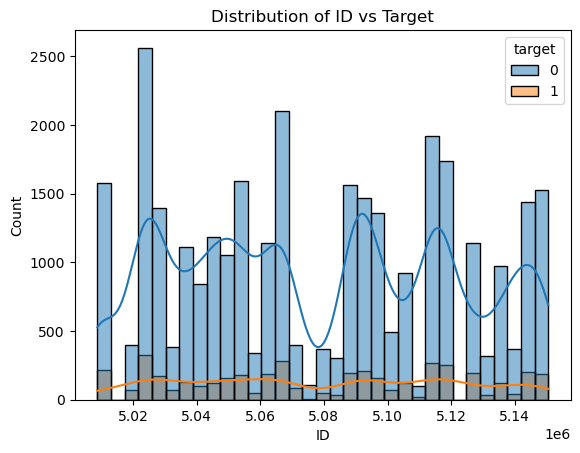

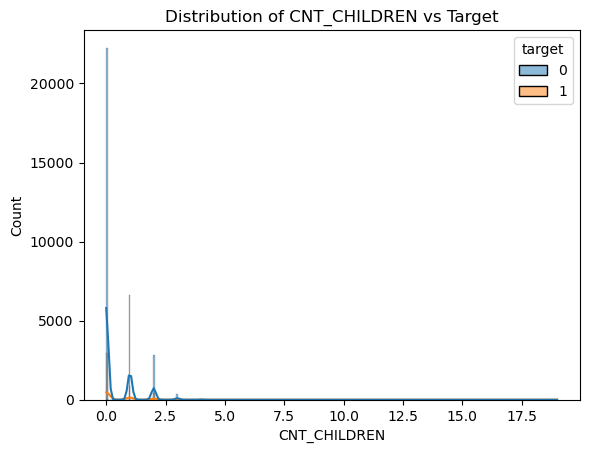

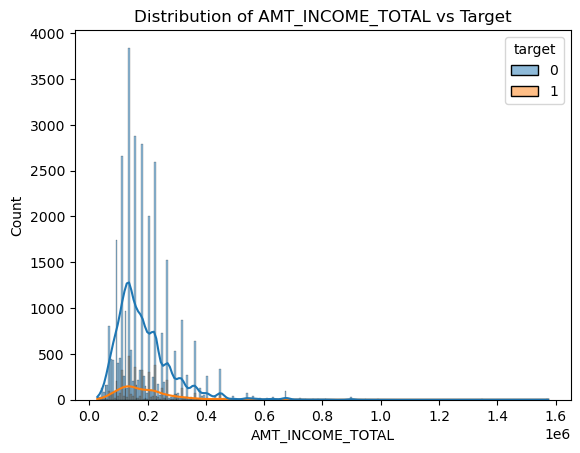

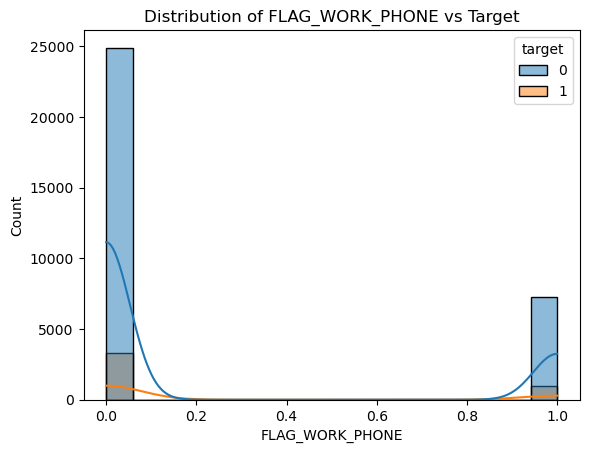

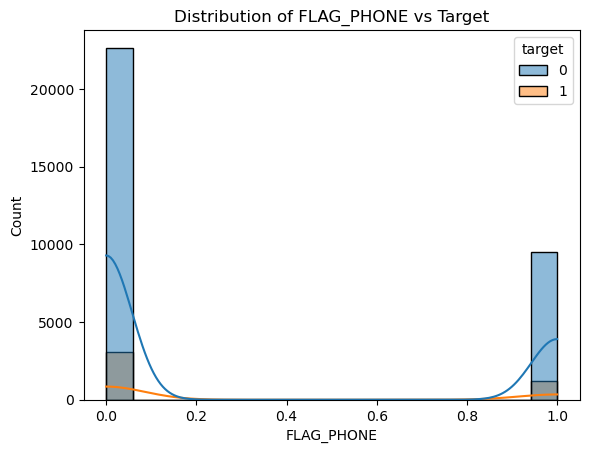

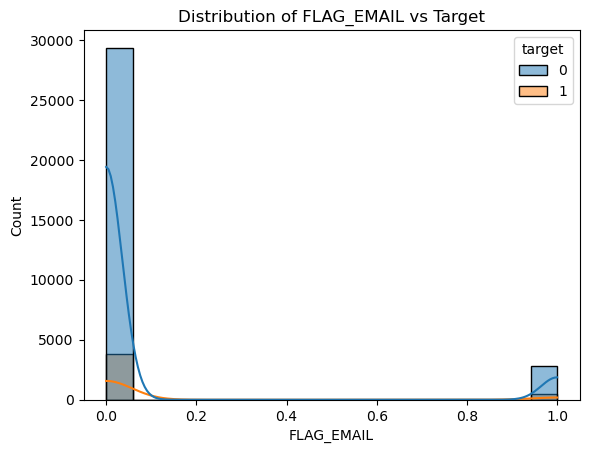

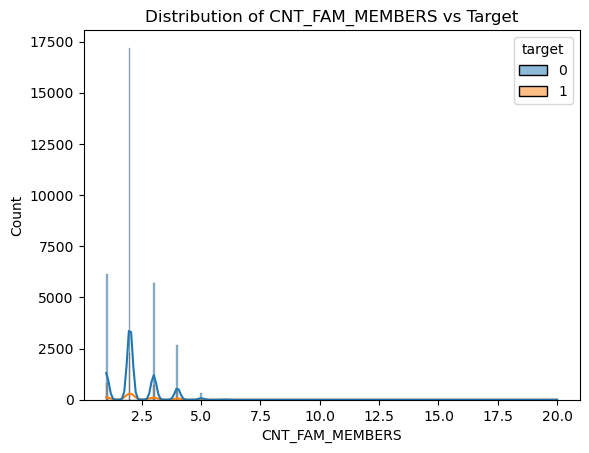

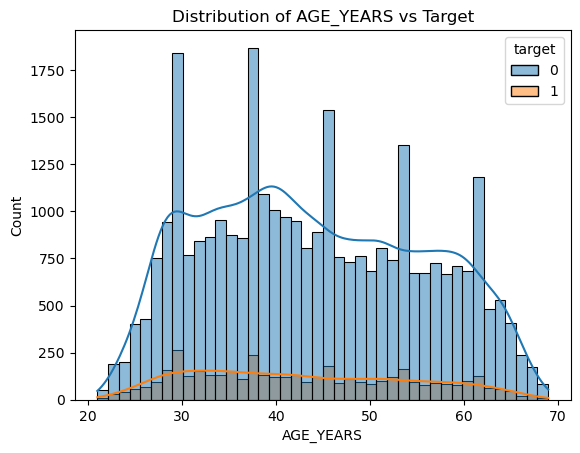

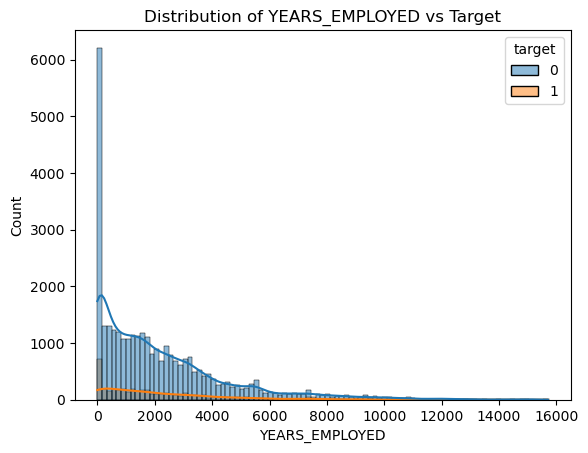

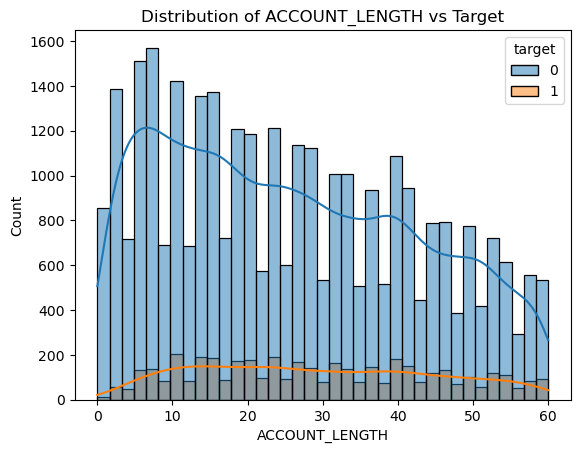

In [65]:
for col in num_cols:
    sns.histplot(data = df, x = col, hue = "target", kde = True)
    plt.title(f'Distribution of {col} vs Target')
    plt.show()
    print()

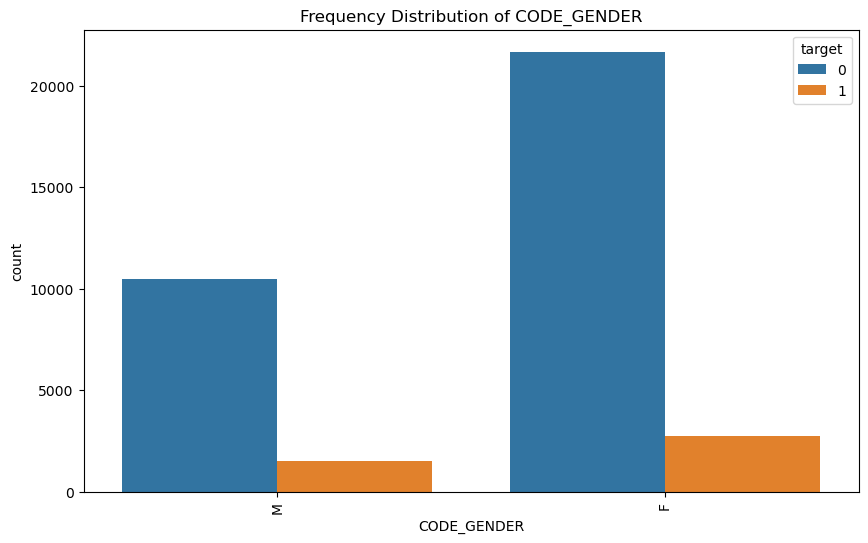

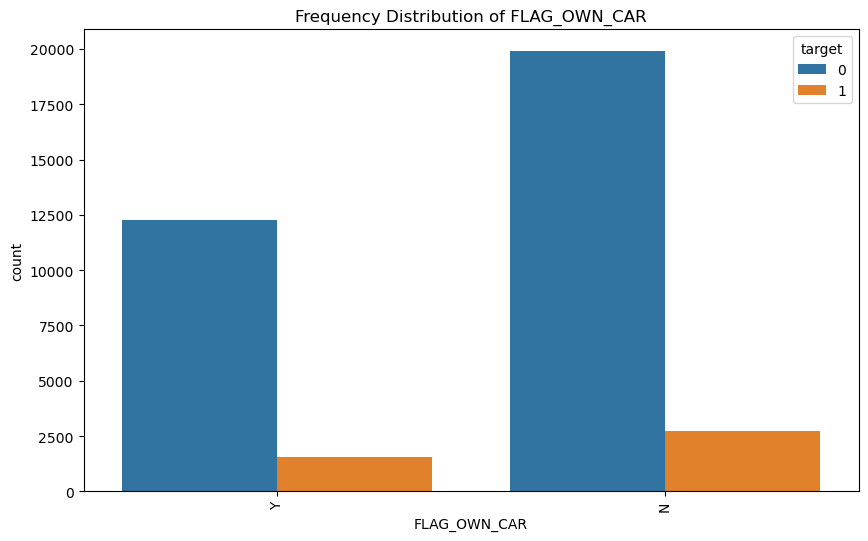

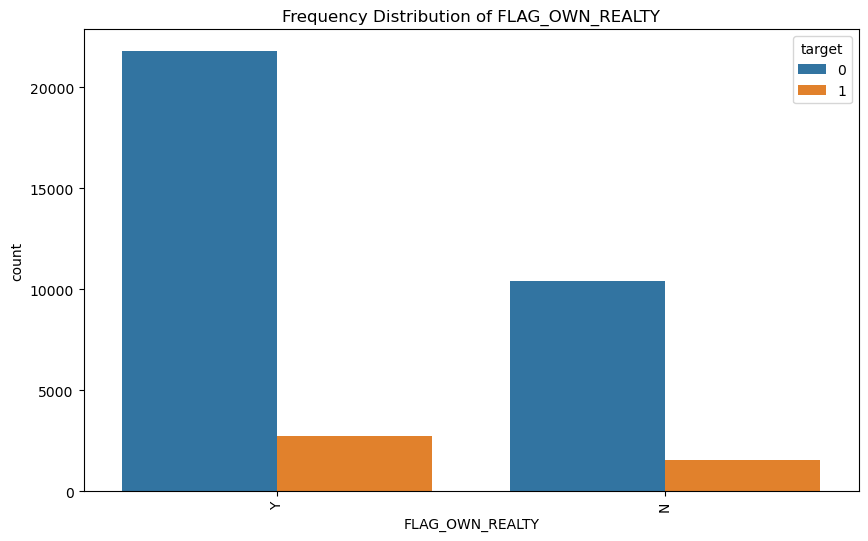

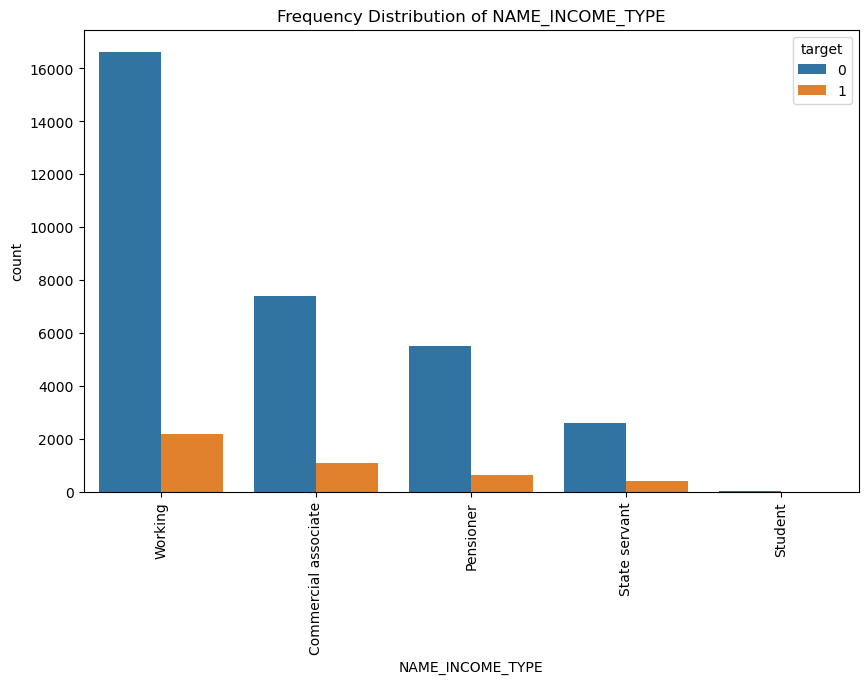

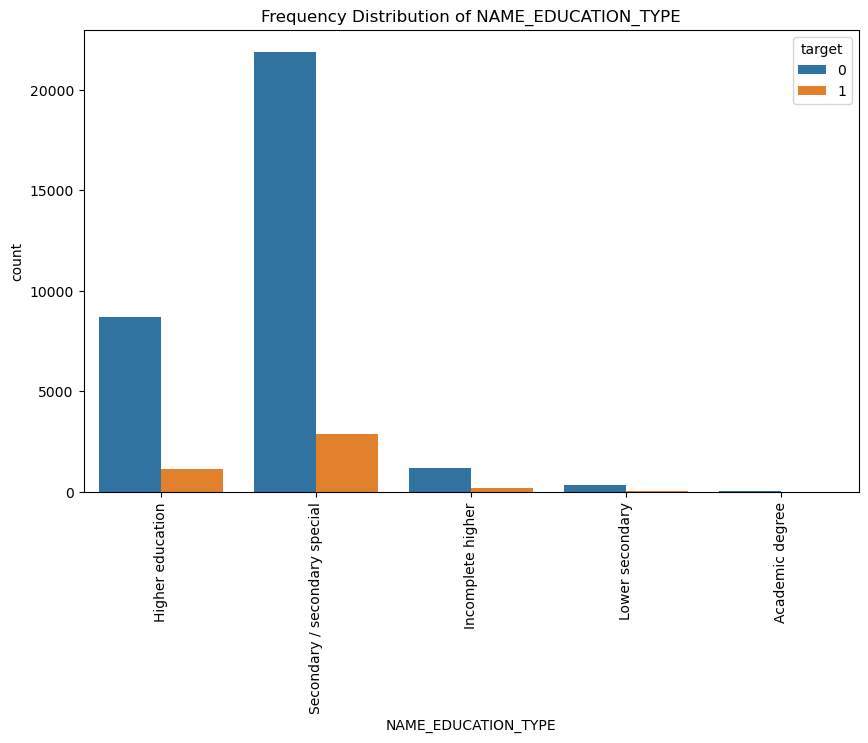

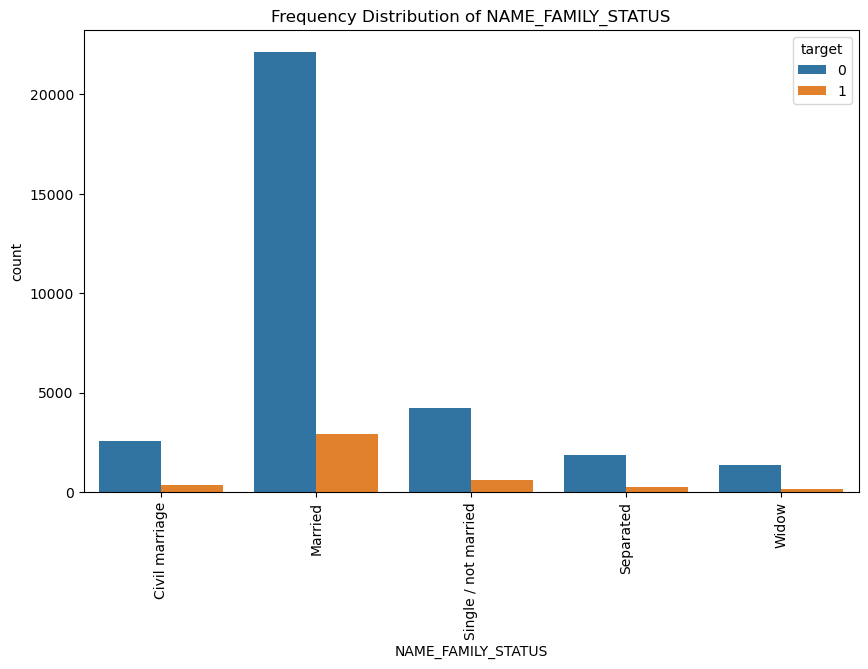

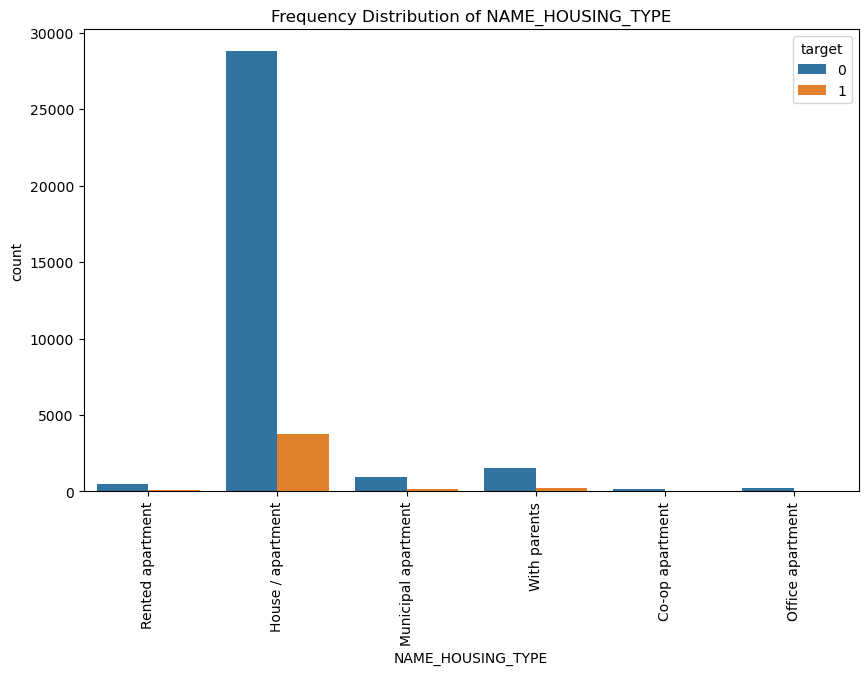

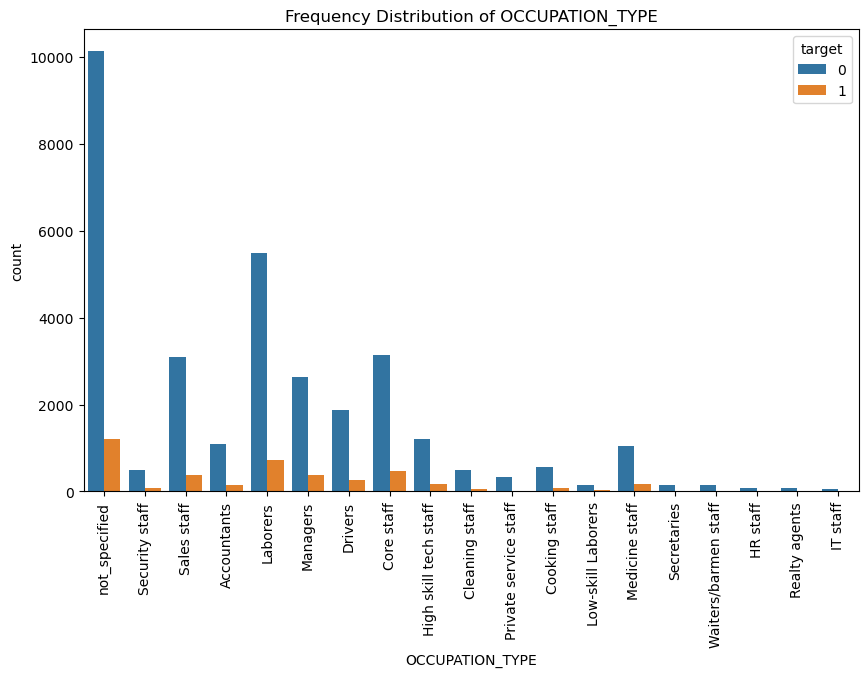

In [66]:
# plotting frequency distribution for categorical variables

for col in cat_cols:
    plt.figure(figsize = (10, 6))
    sns.countplot(data = df, x = col, hue = "target")
    plt.title(f"Frequency Distribution of {col}")
    plt.xticks(rotation = 90)
    plt.show()
    print()

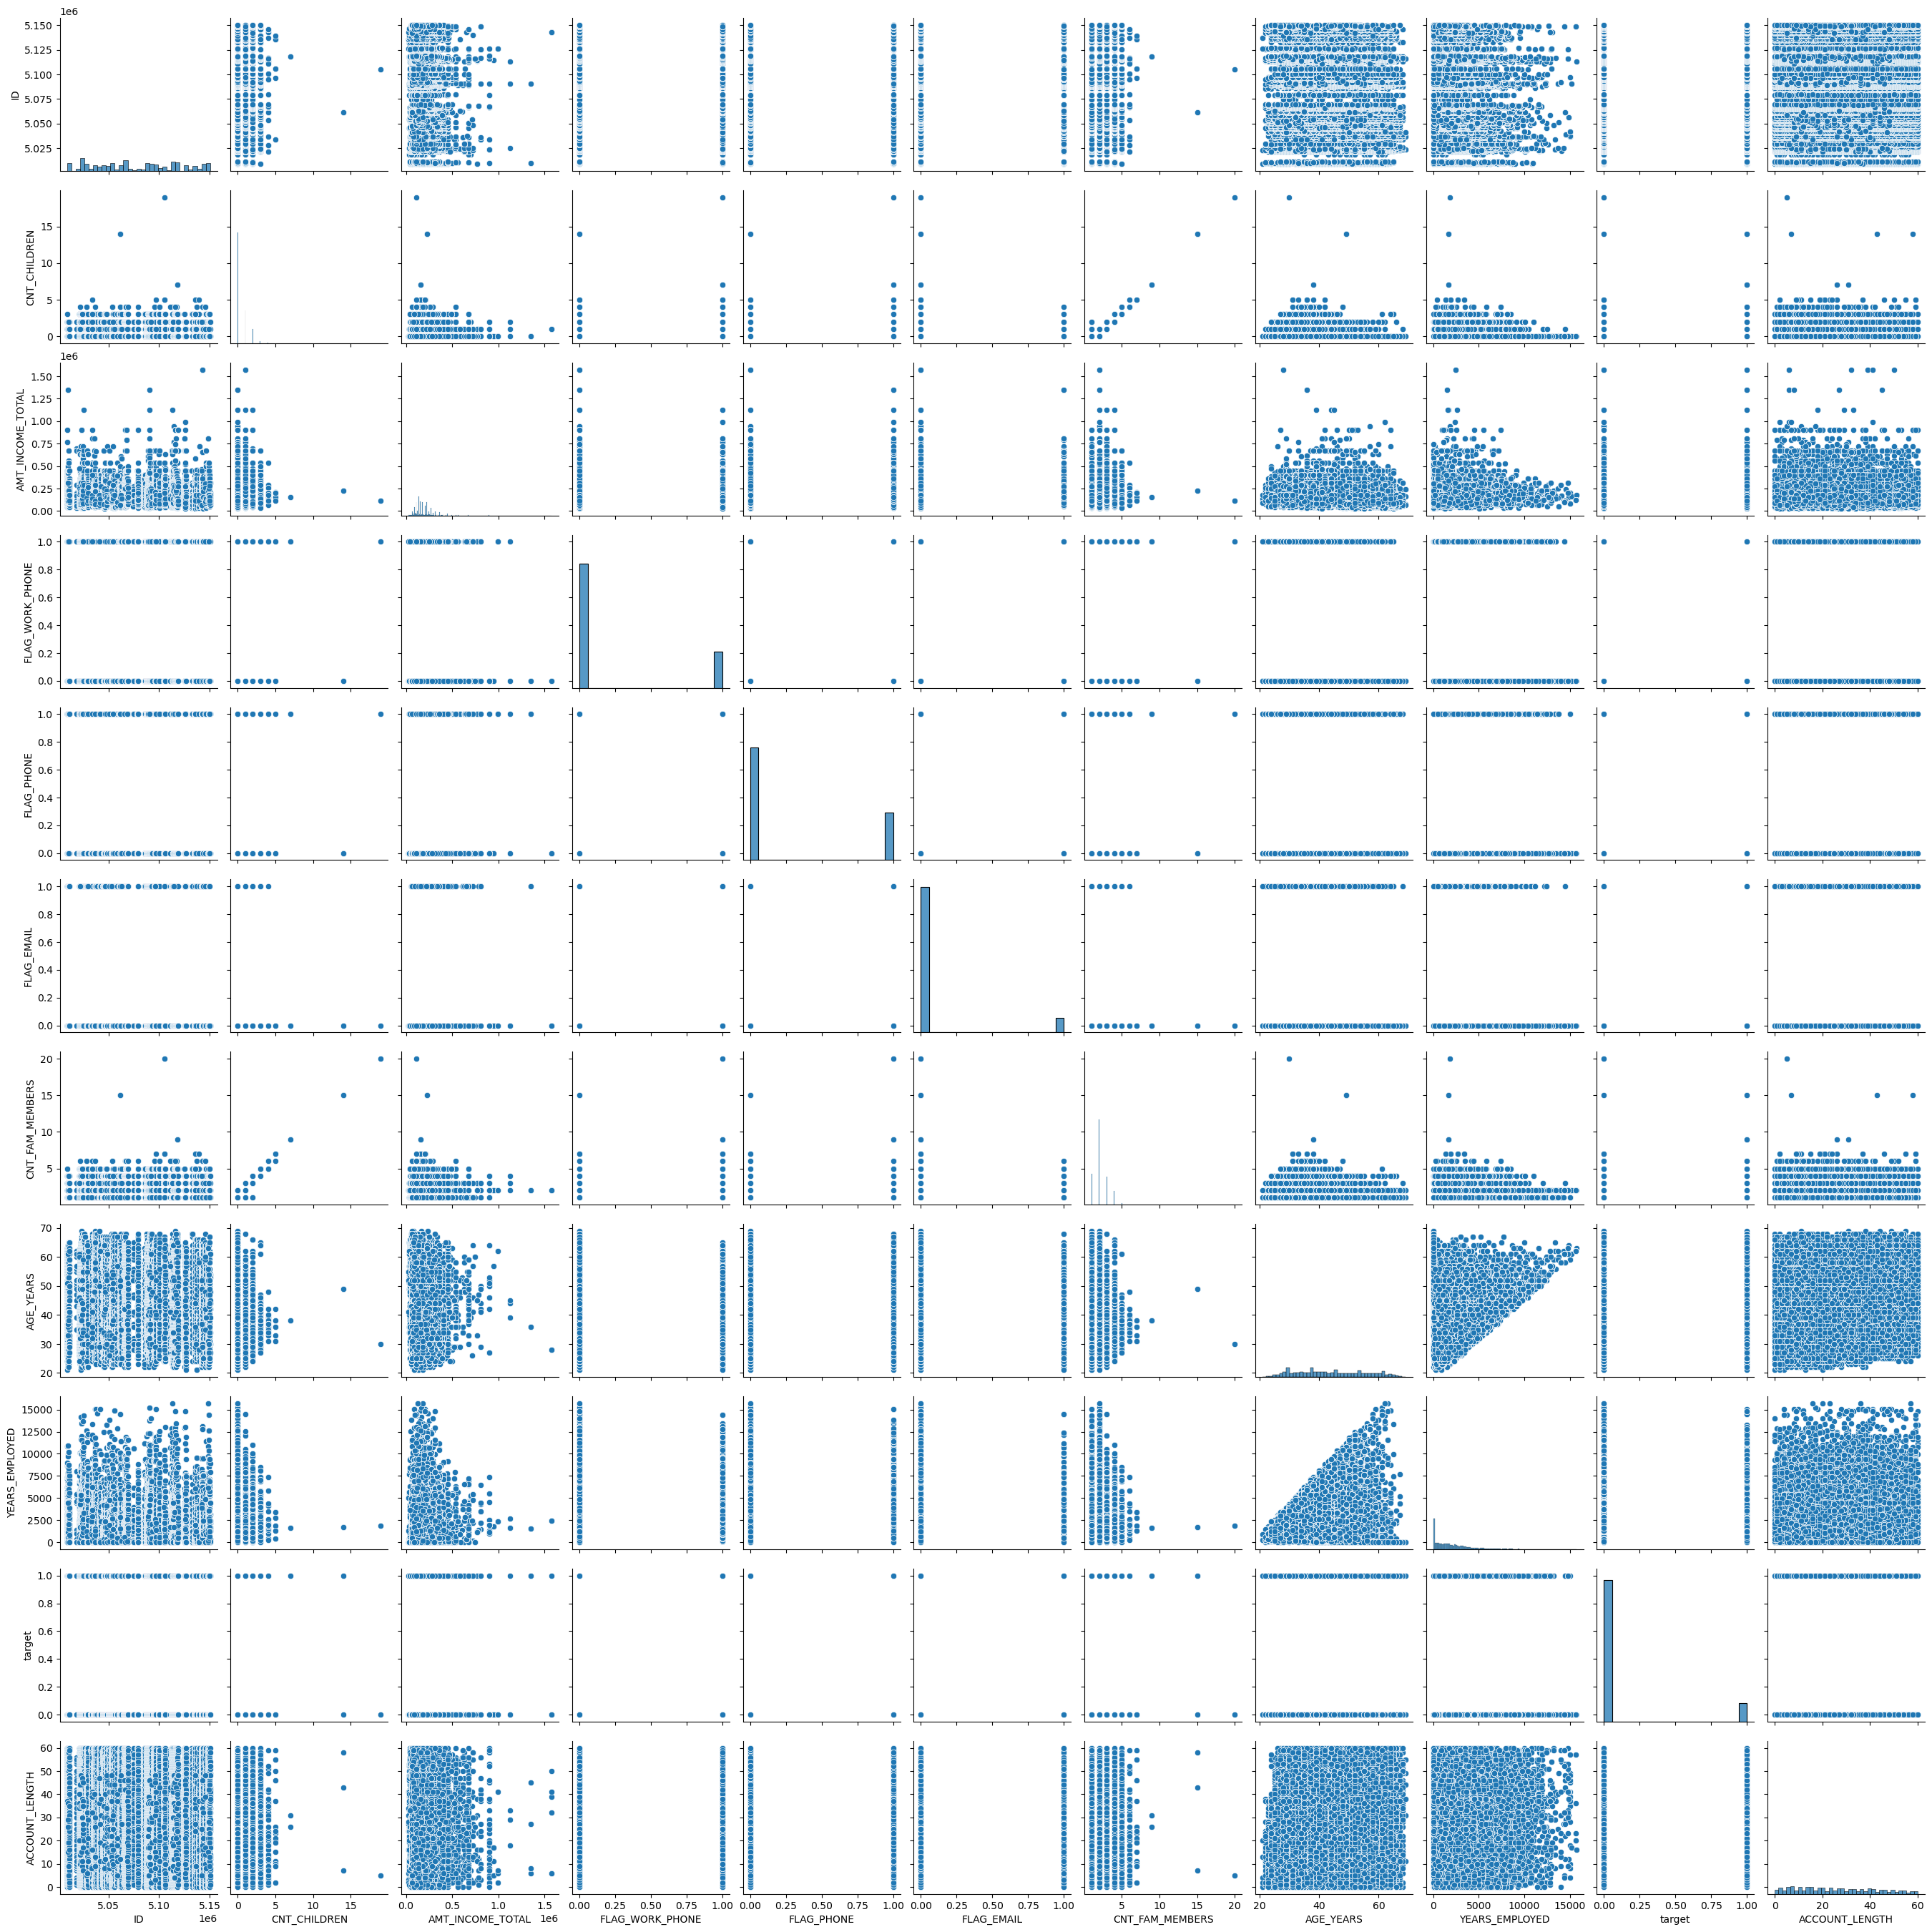

In [67]:
sns.pairplot(data = df)

In [68]:
columns_to_scale = ["AMT_INCOME_TOTAL", "AGE_YEARS", "YEARS_EMPLOYED", "CNT_FAM_MEMBERS"]

In [69]:
dummy = df.copy()

In [70]:
st = StandardScaler()
df[columns_to_scale] = st.fit_transform(df[columns_to_scale])

In [71]:
columns_to_encode = ['CODE_GENDER','FLAG_OWN_CAR','NAME_EDUCATION_TYPE', 'FLAG_OWN_REALTY', 'NAME_INCOME_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'FLAG_WORK_PHONE', 'FLAG_PHONE', 'FLAG_EMAIL', 'OCCUPATION_TYPE']
df=pd.get_dummies(df,columns=columns_to_encode,dtype='int')

In [72]:
df.head()

,ID,CNT_CHILDREN,AMT_INCOME_TOTAL,CNT_FAM_MEMBERS,AGE_YEARS,YEARS_EMPLOYED,target,ACCOUNT_LENGTH,CODE_GENDER_F,CODE_GENDER_M,...,OCCUPATION_TYPE_Low-skill Laborers,OCCUPATION_TYPE_Managers,OCCUPATION_TYPE_Medicine staff,OCCUPATION_TYPE_Private service staff,OCCUPATION_TYPE_Realty agents,OCCUPATION_TYPE_Sales staff,OCCUPATION_TYPE_Secretaries,OCCUPATION_TYPE_Security staff,OCCUPATION_TYPE_Waiters/barmen staff,OCCUPATION_TYPE_not_specified
0,5008804,0,2.365845,-0.217680,-0.933396,0.989403,1,15,0,1,...,0,0,0,0,0,0,0,0,0,1
1,5008805,0,2.365845,-0.217680,-0.933396,0.989403,1,14,0,1,...,0,0,0,0,0,0,0,0,0,1
2,5008806,0,-0.728827,-0.217680,1.324747,-0.450538,0,29,0,1,...,0,0,0,0,0,0,0,1,0,0
3,5008808,0,0.818509,-1.314564,0.716785,0.359429,0,4,1,0,...,0,0,0,0,0,1,0,0,0,0
4,5008809,0,0.818509,-1.314564,0.716785,0.359429,0,26,1,0,...,0,0,0,0,0,1,0,0,0,0


In [73]:
pd.set_option('display.max_columns', None)

In [74]:
df.describe()

,ID,CNT_CHILDREN,AMT_INCOME_TOTAL,CNT_FAM_MEMBERS,AGE_YEARS,YEARS_EMPLOYED,target,ACCOUNT_LENGTH,CODE_GENDER_F,CODE_GENDER_M,FLAG_OWN_CAR_N,FLAG_OWN_CAR_Y,NAME_EDUCATION_TYPE_Academic degree,NAME_EDUCATION_TYPE_Higher education,NAME_EDUCATION_TYPE_Incomplete higher,NAME_EDUCATION_TYPE_Lower secondary,NAME_EDUCATION_TYPE_Secondary / secondary special,FLAG_OWN_REALTY_N,FLAG_OWN_REALTY_Y,NAME_INCOME_TYPE_Commercial associate,NAME_INCOME_TYPE_Pensioner,NAME_INCOME_TYPE_State servant,NAME_INCOME_TYPE_Student,NAME_INCOME_TYPE_Working,NAME_FAMILY_STATUS_Civil marriage,NAME_FAMILY_STATUS_Married,NAME_FAMILY_STATUS_Separated,NAME_FAMILY_STATUS_Single / not married,NAME_FAMILY_STATUS_Widow,NAME_HOUSING_TYPE_Co-op apartment,NAME_HOUSING_TYPE_House / apartment,NAME_HOUSING_TYPE_Municipal apartment,NAME_HOUSING_TYPE_Office apartment,NAME_HOUSING_TYPE_Rented apartment,NAME_HOUSING_TYPE_With parents,FLAG_WORK_PHONE_0,FLAG_WORK_PHONE_1,FLAG_PHONE_0,FLAG_PHONE_1,FLAG_EMAIL_0,FLAG_EMAIL_1,OCCUPATION_TYPE_Accountants,OCCUPATION_TYPE_Cleaning staff,OCCUPATION_TYPE_Cooking staff,OCCUPATION_TYPE_Core staff,OCCUPATION_TYPE_Drivers,OCCUPATION_TYPE_HR staff,OCCUPATION_TYPE_High skill tech staff,OCCUPATION_TYPE_IT staff,OCCUPATION_TYPE_Laborers,OCCUPATION_TYPE_Low-skill Laborers,OCCUPATION_TYPE_Managers,OCCUPATION_TYPE_Medicine staff,OCCUPATION_TYPE_Private service staff,OCCUPATION_TYPE_Realty agents,OCCUPATION_TYPE_Sales staff,OCCUPATION_TYPE_Secretaries,OCCUPATION_TYPE_Security staff,OCCUPATION_TYPE_Waiters/barmen staff,OCCUPATION_TYPE_not_specified
count,3.645700e+04,36457.000000,3.645700e+04,3.645700e+04,3.645700e+04,3.645700e+04,36457.000000,36457.000000,36457.000000,36457.000000,36457.000000,36457.000000,36457.000000,36457.000000,36457.000000,36457.000000,36457.000000,36457.000000,36457.000000,36457.000000,36457.000000,36457.000000,36457.000000,36457.000000,36457.000000,36457.000000,36457.000000,36457.000000,36457.000000,36457.000000,36457.000000,36457.000000,36457.000000,36457.000000,36457.000000,36457.000000,36457.000000,36457.000000,36457.000000,36457.000000,36457.000000,36457.000000,36457.000000,36457.000000,36457.000000,36457.000000,36457.000000,36457.000000,36457.000000,36457.000000,36457.000000,36457.000000,36457.000000,36457.000000,36457.000000,36457.000000,36457.000000,36457.000000,36457.000000,36457.000000
mean,5.078227e+06,0.430315,1.559191e-18,2.424542e-16,-1.060250e-16,-3.040422e-17,0.117700,26.164193,0.670105,0.329895,0.620292,0.379708,0.000878,0.270565,0.038676,0.010259,0.679623,0.327811,0.672189,0.232877,0.168747,0.081877,0.000302,0.516197,0.080780,0.687056,0.057684,0.132457,0.042022,0.004608,0.892778,0.030941,0.007187,0.015772,0.048715,0.774474,0.225526,0.705187,0.294813,0.910278,0.089722,0.034040,0.015114,0.017966,0.098500,0.058644,0.002332,0.037935,0.001646,0.170365,0.004800,0.082618,0.033107,0.009436,0.002167,0.095592,0.004142,0.016238,0.004773,0.310585
std,4.187524e+04,0.742367,1.000014e+00,1.000014e+00,1.000014e+00,1.000014e+00,0.322257,16.501854,0.470181,0.470181,0.485321,0.485321,0.029614,0.444258,0.192824,0.100766,0.466628,0.469422,0.469422,0.422670,0.374533,0.274181,0.017368,0.499744,0.272501,0.463698,0.233149,0.338992,0.200642,0.067728,0.309400,0.173159,0.084470,0.124594,0.215274,0.417934,0.417934,0.455965,0.455965,0.285787,0.285787,0.181335,0.122007,0.132831,0.297993,0.234961,0.048230,0.191042,0.040535,0.375958,0.069118,0.275308,0.178920,0.096680,0.046501,0.294035,0.064225,0.126392,0.068921,0.462740
min,5.008804e+06,0.000000,-1.568810e+00,-1.314564e+00,-1.975616e+00,-9.296731e-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000

## Model Implementation

In [75]:
X = df.drop(["target"], axis = 1)
y = df["target"]

In [76]:
y.head()

0    1
1    1
2    0
3    0
4    0
Name: target, dtype: int32

In [77]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [78]:
model = LogisticRegression()
model.fit(X_train, y_train)

# Predicting test cases
y_pred = model.predict(X_test)
print(y_pred)

[0 0 0 ... 0 0 0]


In [79]:
y_pred.shape

(10938,)

In [80]:
# Printing the classification report to analyze model's performance
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      1.00      0.93      9601
           1       0.00      0.00      0.00      1337

    accuracy                           0.88     10938
   macro avg       0.44      0.50      0.47     10938
weighted avg       0.77      0.88      0.82     10938



E:\Anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
E:\Anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
E:\Anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [81]:
from sklearn.metrics import accuracy_score
test_score = accuracy_score(y_test, model.predict(X_test)) * 100
train_score = accuracy_score(y_train, model.predict(X_train)) * 100

In [82]:
results_df = pd.DataFrame(data = [["Logistic Regression", train_score, test_score]], columns = ["Model", "Training Accuracy%", "Testing Accuracy%"])
results_df

,Model,Training Accuracy%,Testing Accuracy%
0,Logistic Regression,88.424311,87.776559


In [83]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

dt = model.predict(X_test)
print(classification_report(y_test, dt))

              precision    recall  f1-score   support

           0       0.90      0.90      0.90      9601
           1       0.31      0.32      0.32      1337

    accuracy                           0.83     10938
   macro avg       0.61      0.61      0.61     10938
weighted avg       0.83      0.83      0.83     10938



In [84]:
test_score = accuracy_score(y_test, model.predict(X_test)) * 100
train_score = accuracy_score(y_train, model.predict(X_train)) * 100

results_df = pd.DataFrame(data=[["Decision Tree Classifier", train_score, test_score]],
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])
results_df

,Model,Training Accuracy %,Testing Accuracy %
0,Decision Tree Classifier,100.0,83.086487


In [85]:
from sklearn.svm import SVC
model=SVC(kernel="rbf")
model.fit(X_train,y_train)
sv=model.predict(X_test)
from sklearn import metrics
print(classification_report(y_test,sv))

              precision    recall  f1-score   support

           0       0.88      1.00      0.93      9601
           1       0.00      0.00      0.00      1337

    accuracy                           0.88     10938
   macro avg       0.44      0.50      0.47     10938
weighted avg       0.77      0.88      0.82     10938



E:\Anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
E:\Anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
E:\Anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [86]:
from sklearn.metrics import accuracy_score

test_score = accuracy_score(y_test, model.predict(X_test)) * 100
train_score = accuracy_score(y_train, model.predict(X_train)) * 100

results_df = pd.DataFrame(data=[["Support Vector Classifier", train_score, test_score]],
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])
results_df

,Model,Training Accuracy %,Testing Accuracy %
0,Support Vector Classifier,88.424311,87.776559


In [87]:
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

[[9601    0]
 [1337    0]]


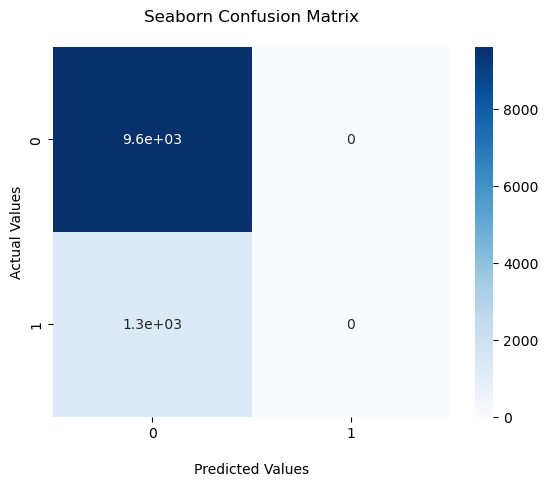

In [88]:
axis = sns.heatmap(conf_matrix, annot = True, cmap = "Blues")

axis.set_title("Seaborn Confusion Matrix\n")
axis.set_xlabel("\nPredicted Values")
axis.set_ylabel('Actual Values')

plt.show()